Detection with OpenCV Deep Neural Network (DNN)

In [ ]:
# Import the necessary packages
import numpy as np
import cv2
import matplotlib.pyplot as plt

Load the Pre-Trained Model

In [ ]:
net = cv2.dnn.readNetFromDarknet("/home/neosoft/Downloads/yolov3_custom.cfg", "/home/neosoft/Downloads/yolov3_custom_5000.weights")
confidence_threshold, nms_threshold = 0.5, 0.5

Read the Image and Prepare it for Model Input

Image Shape is: (225, 400, 3)
Blob Shape: (1, 3, 416, 416)


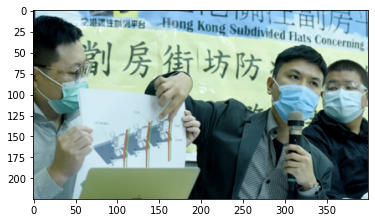

In [ ]:
image_path = "/home/neosoft/Documents/object_detection_tasks/yolov3_mask_detection/custom_dataset/maksssksksss667.png"
image = cv2.imread(image_path)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
(H, W) = image.shape[:2]
print("Image Shape is: " + str(image.shape))

blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
print("Blob Shape: " + str(blob.shape))
net.setInput(blob)

Forward Propagate the Input Through the Model

In [ ]:
# getLayerNames() gives the name of all layers of the network.
# getUnconnectedOutLayers() gives the index of the output layers.

output_layers = net.getUnconnectedOutLayersNames()
print("output Layers are" + str(output_layers))

# Performs a forward pass of the YOLO object detector, giving us 
# our bounding boxes and associated probabilities
layer_outputs = net.forward(output_layers)

output Layers are('yolo_82', 'yolo_94', 'yolo_106')


Looping Over the Detections and Drawing the Bounding Boxes

In [ ]:
# Initialize our lists of detected bounding boxes, confidences, and class ids respectively.
boxes, confidences, class_ids = [], [], []

# Loop over each of the layer outputs
for output in layer_outputs:
    # Loop over each of the detections
    for detection in output:
        # Extract the class ID and confidence (i.e., probability) of
        # the current object detection
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        # Filter out weak predictions by ensuring the detected
        # probability is greater than the minimum probability
        if confidence > confidence_threshold:
            # scale the bounding box coordinates back relative to the
            # size of the image, keeping in mind that YOLO actually
            # returns the center (x, y)-coordinates of the bounding box
            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")

            # Use the center (x, y)-coordinates to derive the top and
            # and left corner of the bounding box
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))

            # Update list of bounding box coordinates, confidences, and class IDs
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [ ]:
# Apply non-maxima suppression to suppress weak, overlapping and low confident bounding boxes.
indices = cv2.dnn.NMSBoxes(boxes, confidences, confidence_threshold, nms_threshold)
print("Indices: " + str(indices))

Indices: [3 1 0]


Counting and printing each class

With mask: 3
without mask: 0
Improper mask: 0


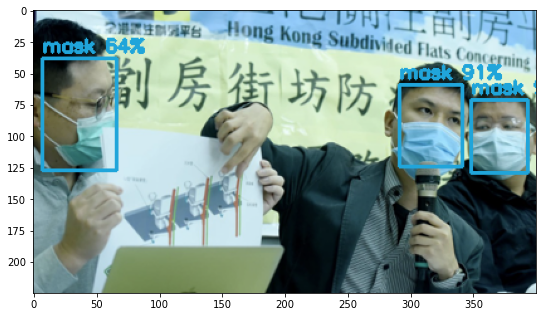

In [ ]:
# Draw the filtered bounding boxes with their class to the image
with open("/home/neosoft/Documents/object_detection_tasks/yolov3_mask_detection/custom_dataset/classes.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

count_with_mask = 0
count_without_mask = 0
count_improper_mask = 0

# Ensure at least one detection exists
if len(indices) > 0:
    # Loop over the indexes we are keeping
    for index in indices.flatten():
        # Extract the bounding box coordinates
        x, y, w, h = boxes[index]
        label = str(classes[class_ids[index]])
        confidence = str((int(confidences[index] *100)))
        if label == "mask":
            cv2.rectangle(image, (x, y), (x + w, y + h), (218, 165, 32), 2)
            cv2.putText(image,label + " " + confidence + "%", (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (218, 165, 32), 2)
            count_with_mask += 1
            
        if label == "no_mask":
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 20, 147), 2)
            cv2.putText(image,label + " " + confidence + "%", (x, y - 8), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 20, 147), 2)
            count_without_mask += 1
        
        if label == "improper_mask":
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 20, 147), 2)
            cv2.putText(image,label + " " + confidence + "%", (x, y - 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 20, 147), 2)
            count_improper_mask += 1

            
print("With mask: " + str(count_with_mask))
print("without mask: "+str(count_without_mask))
print("Improper mask: "+str(count_improper_mask))

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.rcParams['figure.figsize'] = (9, 9)
plt.imshow(image)